<a href="https://colab.research.google.com/github/beatrizfsrusso/alcohol-highschool-analysis/blob/main/ProjetoPANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving student-mat.csv to student-mat.csv


Número de linhas (tuplas): 395
Número de colunas (atributos): 33


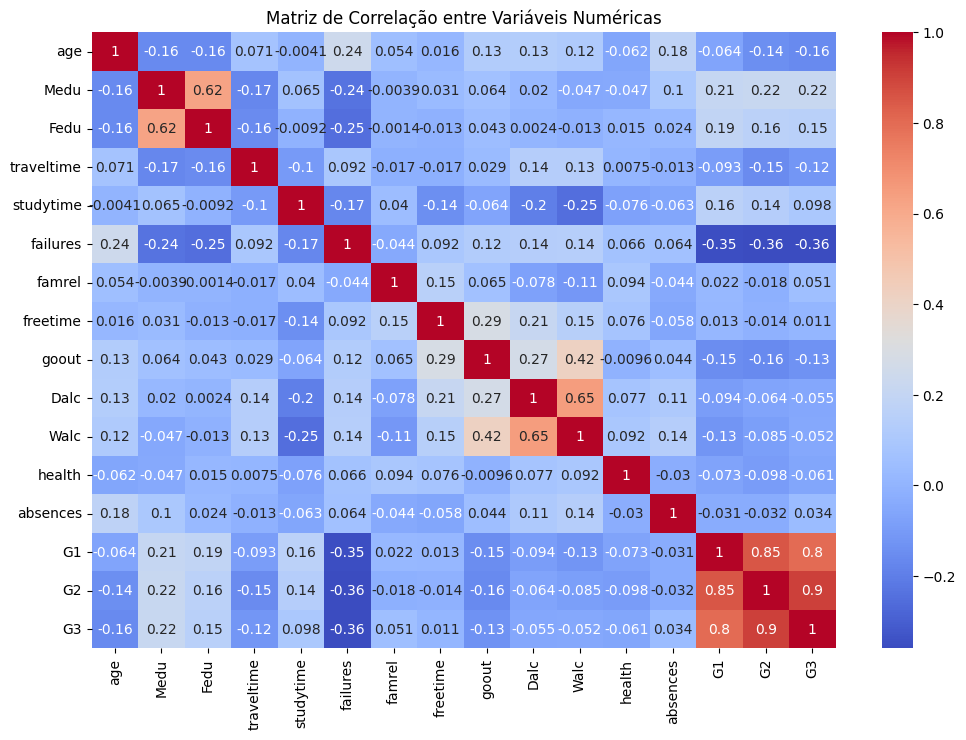

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
df = pd.read_csv("student-mat.csv")

print(f"Número de linhas (tuplas): {df.shape[0]}")
print(f"Número de colunas (atributos): {df.shape[1]}")

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

df.info()  # Mostra o tipo de cada coluna e se há valores ausentes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue o CSV diretamente (altere o nome se for o de português)
df = pd.read_csv("student-mat.csv")

# Informações iniciais
print("Formato da base:", df.shape)
print("Colunas:", df.columns.tolist())
df.head()

Formato da base: (395, 33)
Colunas: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Series([], dtype: int64)


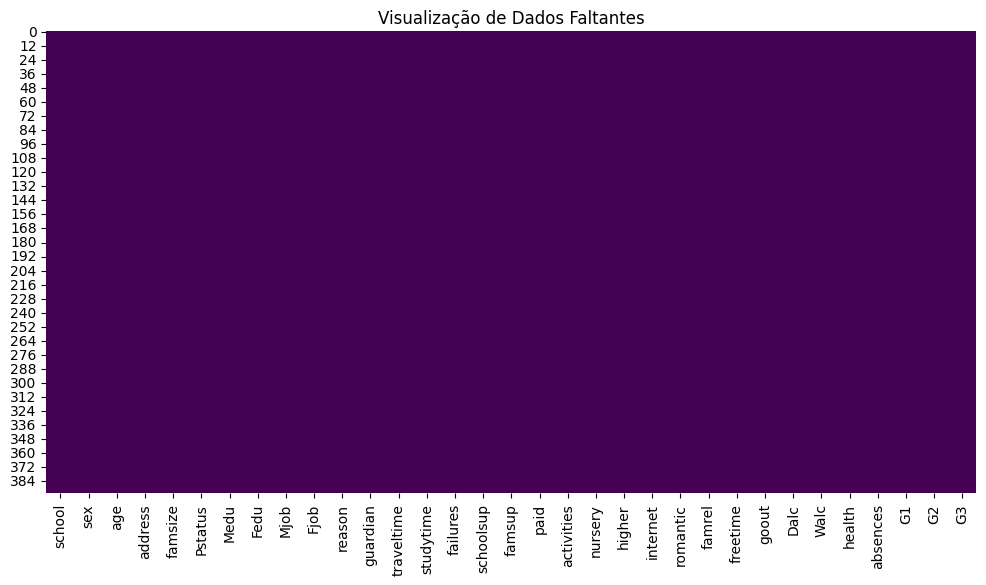

In [ ]:
# Verifica valores nulos
missing = df.isnull().sum()
print(missing[missing > 0])  # Mostra apenas os com valores ausentes

# Gráfico de calor para visualizar onde estão os nulos
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualização de Dados Faltantes")
plt.show()

In [ ]:
# Exemplo de estratégia: preencher com mediana (para atributos numéricos)
df.fillna(df.median(numeric_only=True), inplace=True)

# Para categóricos: df['coluna'].fillna(df['coluna'].mode()[0], inplace=True)

In [ ]:
# Verifique os valores únicos
for col in ['sex', 'school', 'address', 'famsize', 'Pstatus',
            'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    print(f"{col}: {df[col].unique()}")

sex: ['F' 'M']
school: ['GP' 'MS']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [ ]:
# Exemplo de limpeza
df['schoolsup'] = df['schoolsup'].str.lower().str.strip()
df['schoolsup'].replace({'yes': 'yes', 'no': 'no'}, inplace=True)

/tmp/ipython-input-11-4159718977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['schoolsup'].replace({'yes': 'yes', 'no': 'no'}, inplace=True)


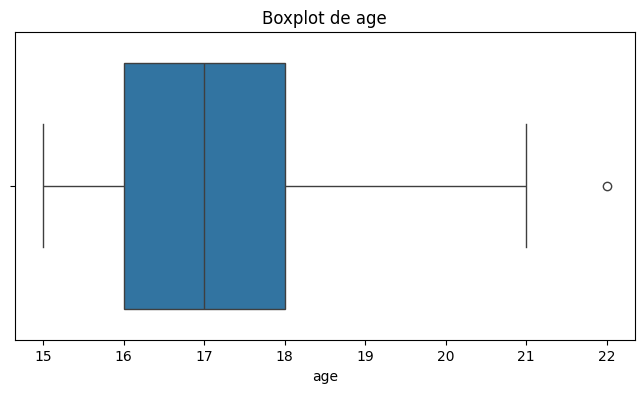

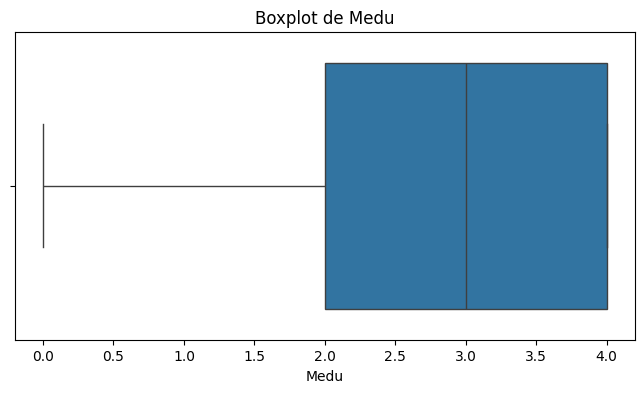

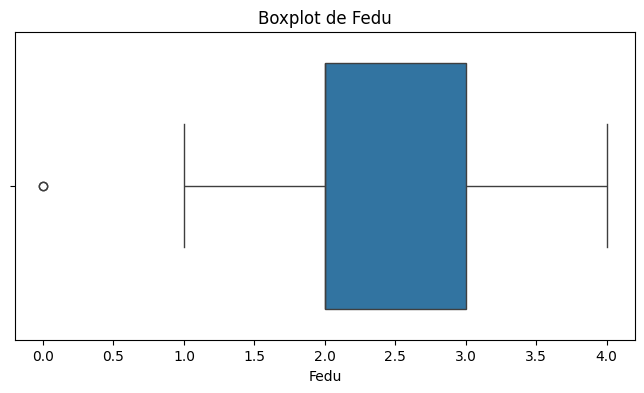

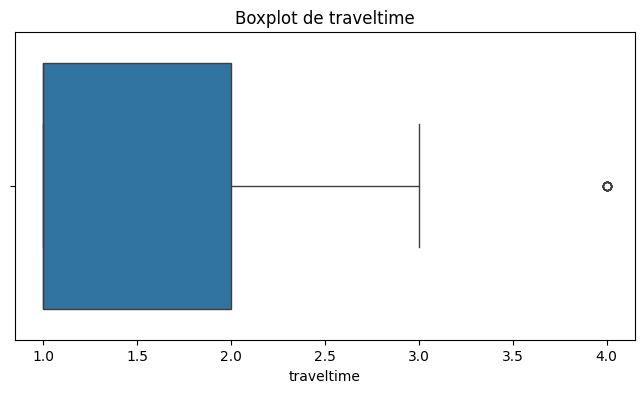

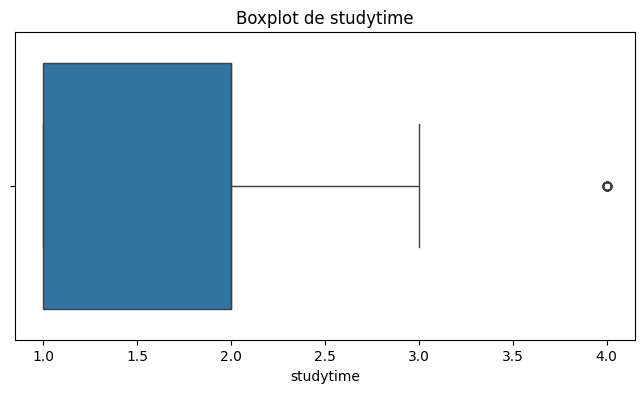

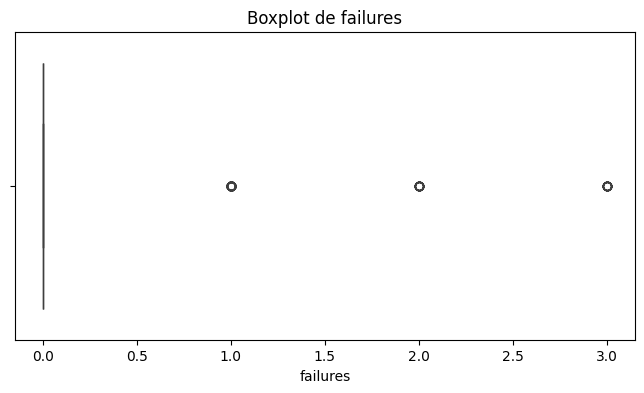

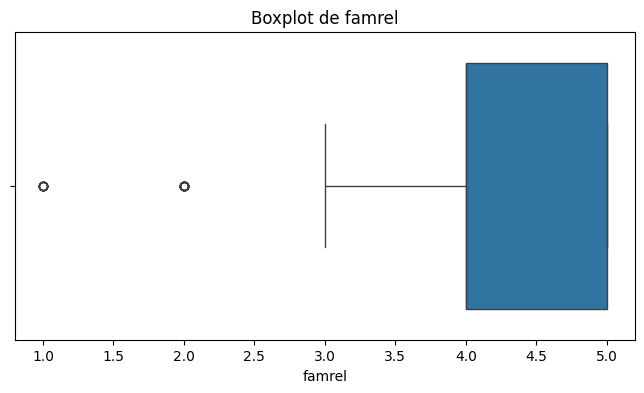

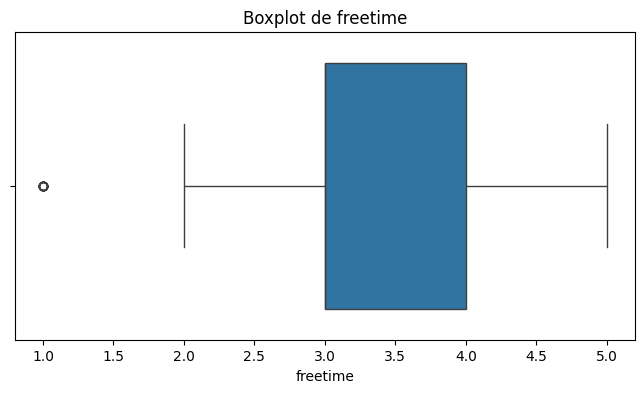

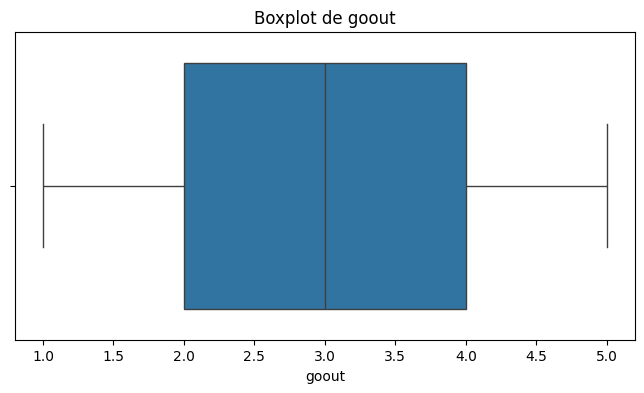

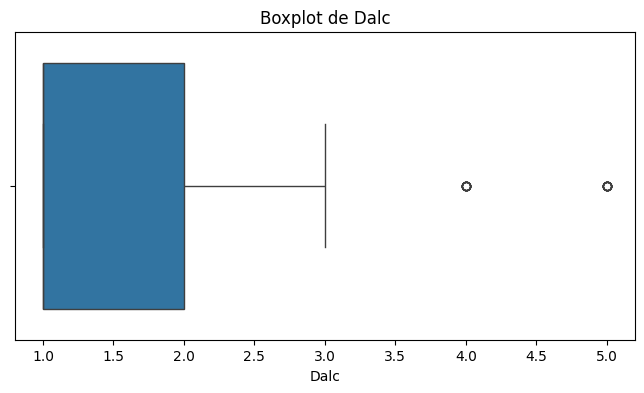

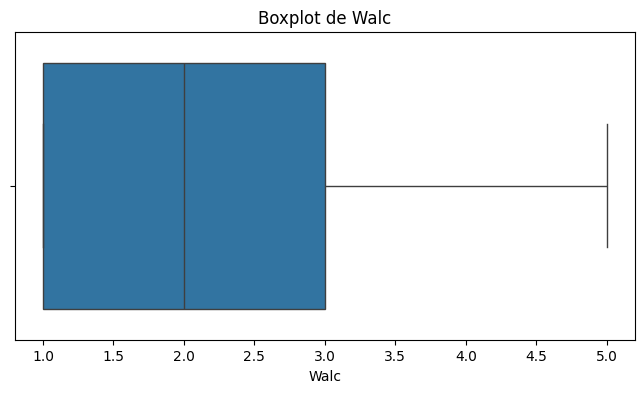

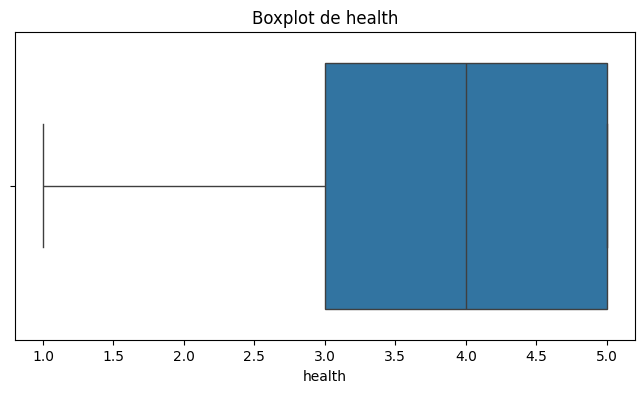

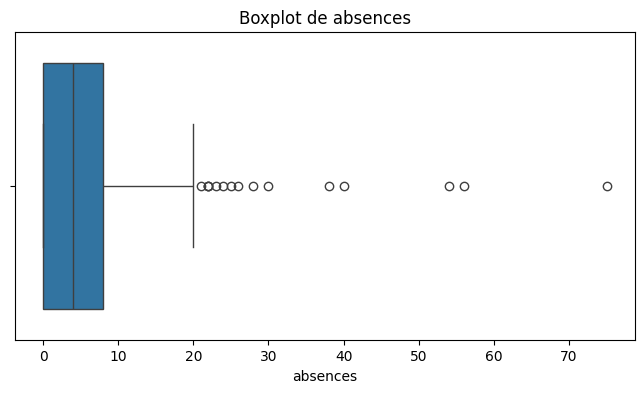

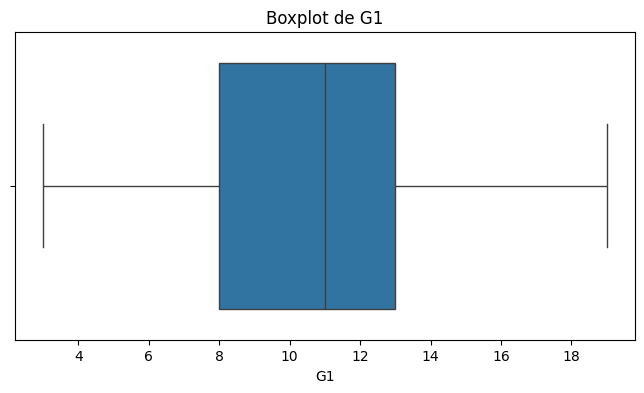

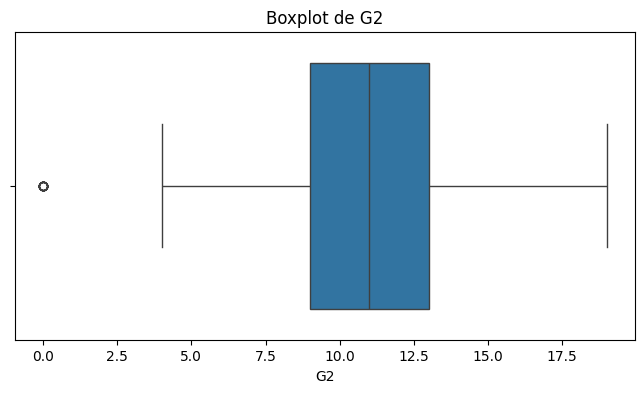

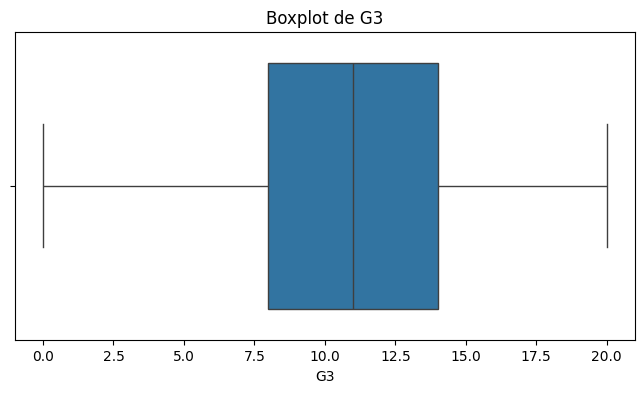

In [ ]:
# Boxplot para detectar outliers em variáveis numéricas
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col}")
    plt.show()

In [ ]:
# Remover outliers extremos no atributo 'absences'
q1 = df['absences'].quantile(0.25)
q3 = df['absences'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df = df[(df['absences'] >= limite_inferior) & (df['absences'] <= limite_superior)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['G1', 'G2', 'G3']] = scaler.fit_transform(df[['G1', 'G2', 'G3']])

In [ ]:
df['age_group'] = pd.cut(df['age'], bins=[14, 16, 18, 20, 22], labels=["15-16", "17-18", "19-20", "21-22"])


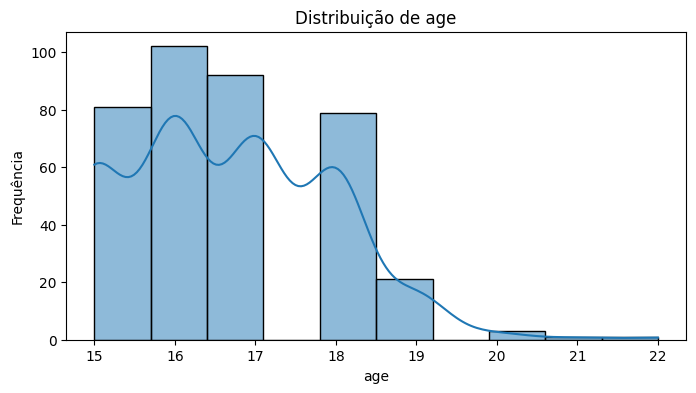

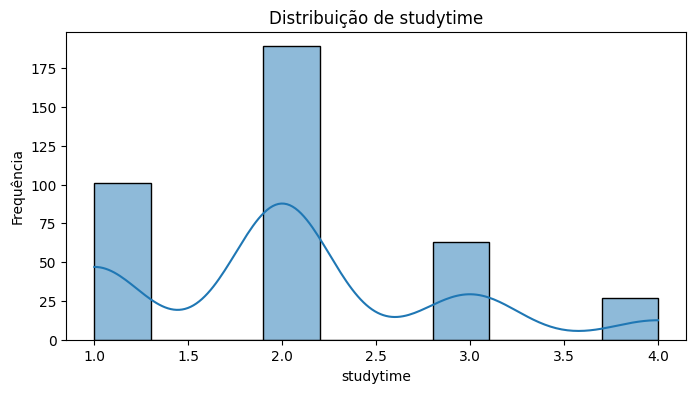

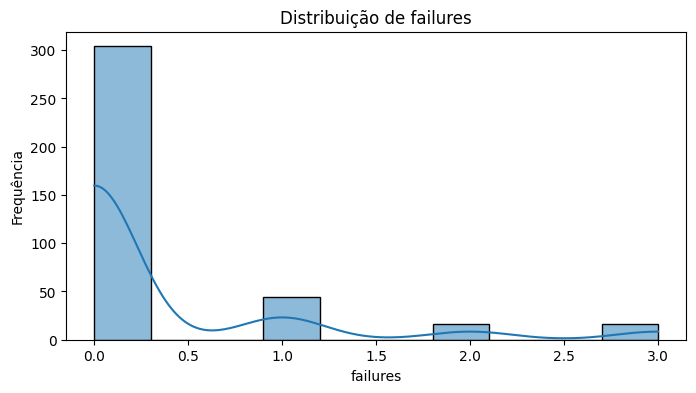

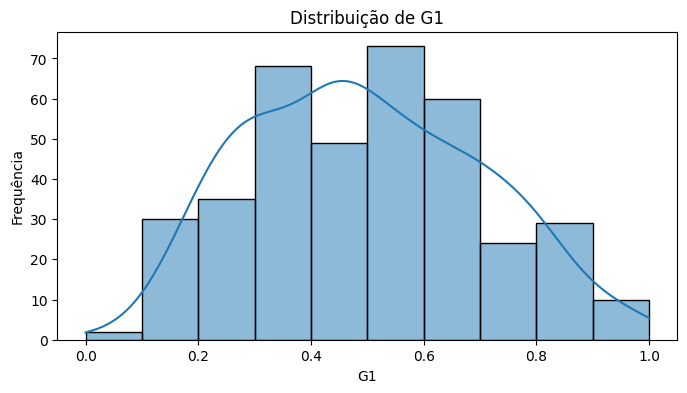

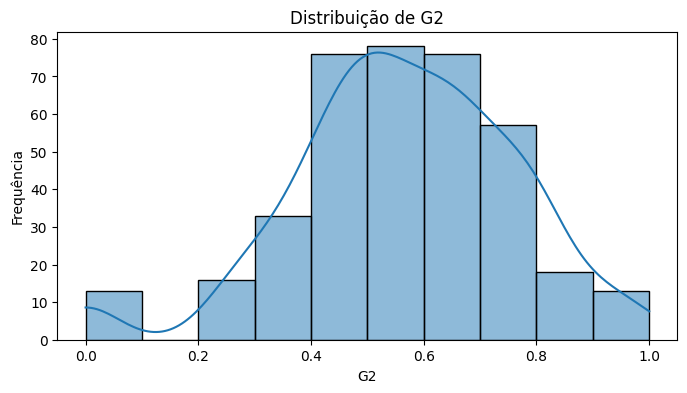

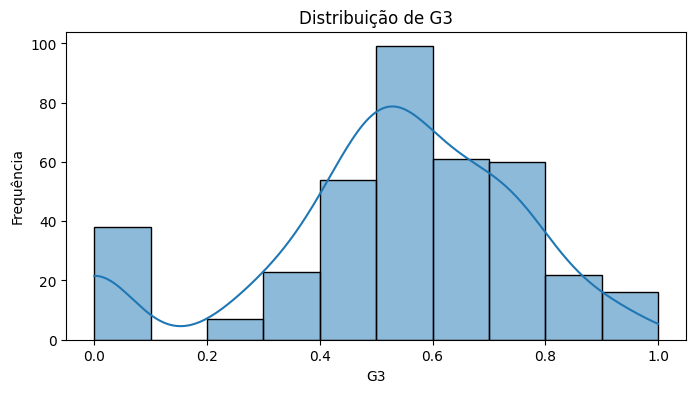

In [ ]:
for col in ['age', 'studytime', 'failures', 'G1', 'G2', 'G3']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

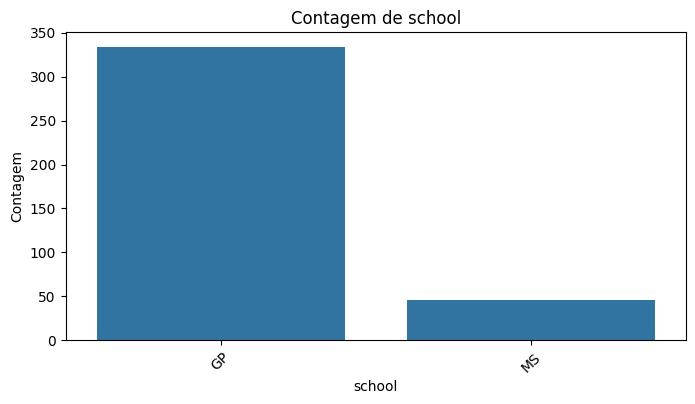

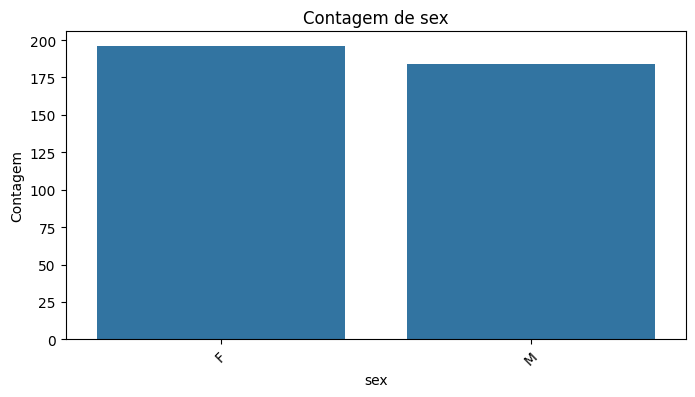

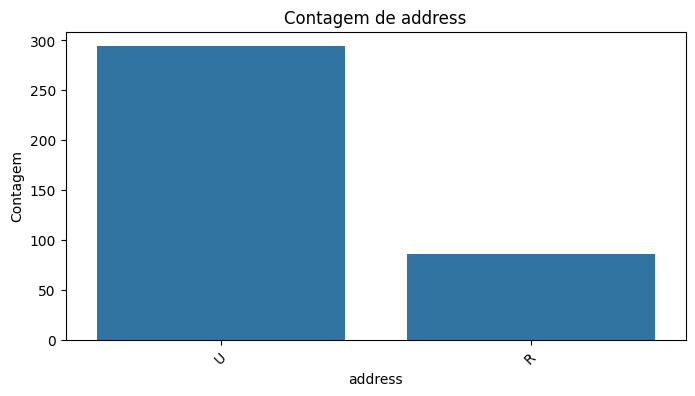

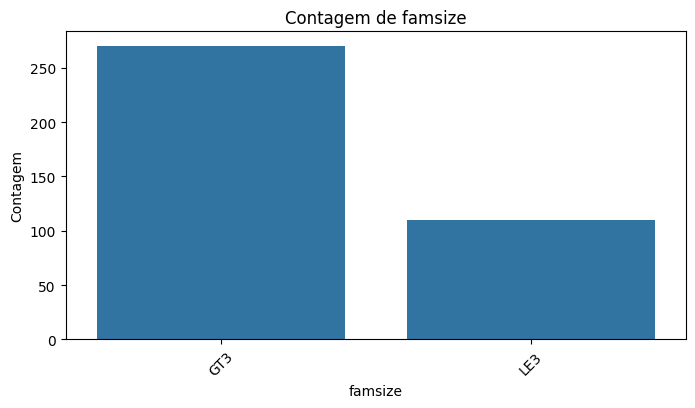

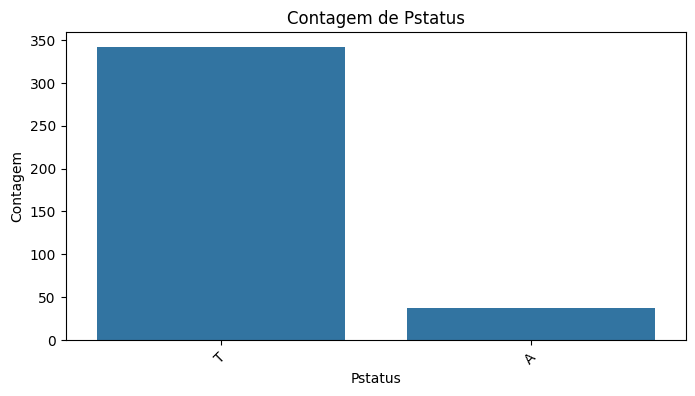

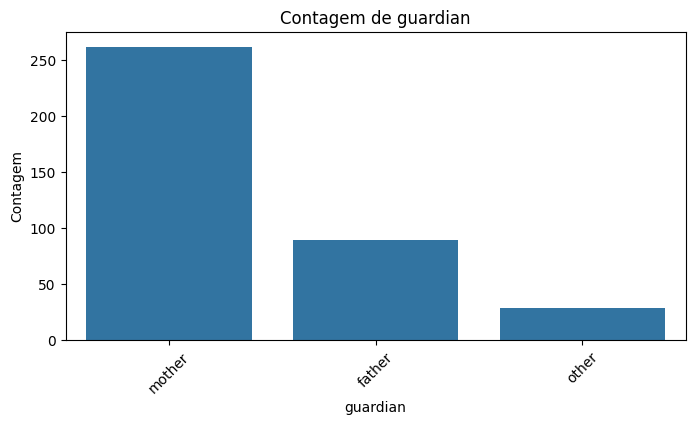

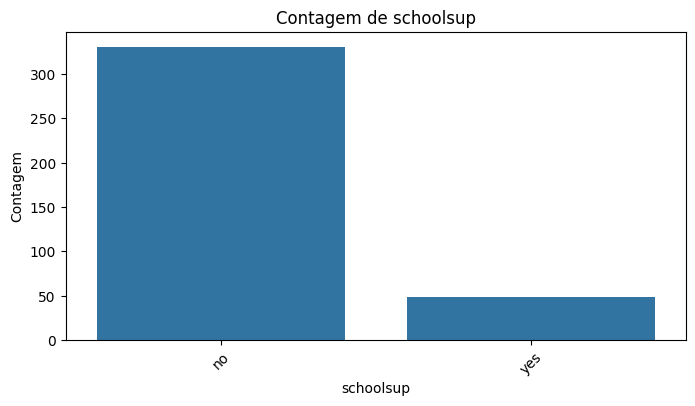

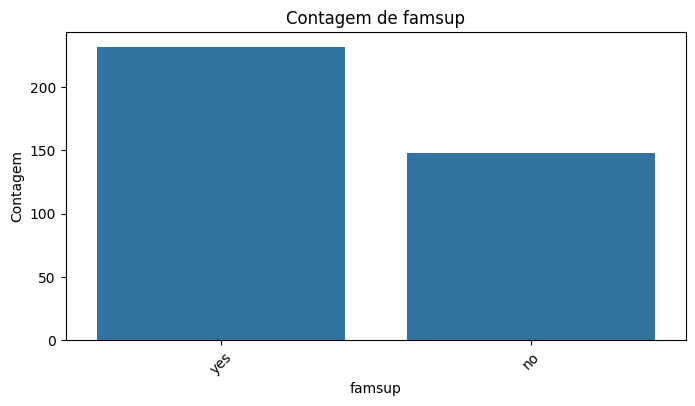

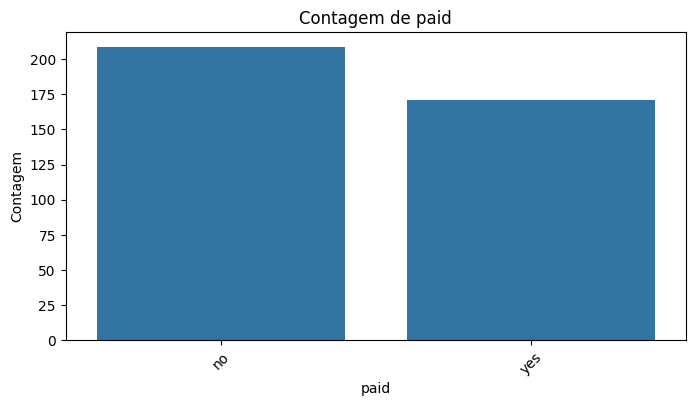

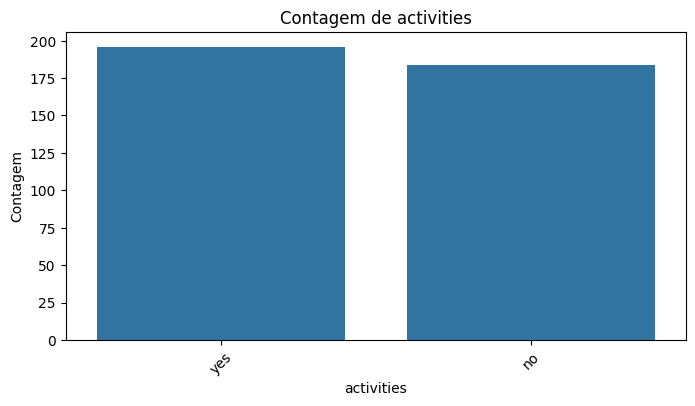

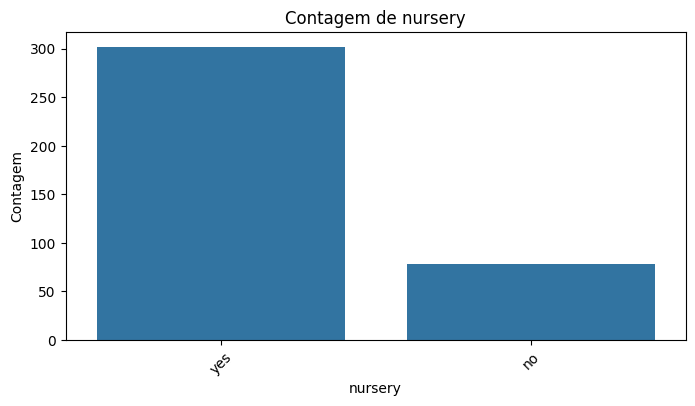

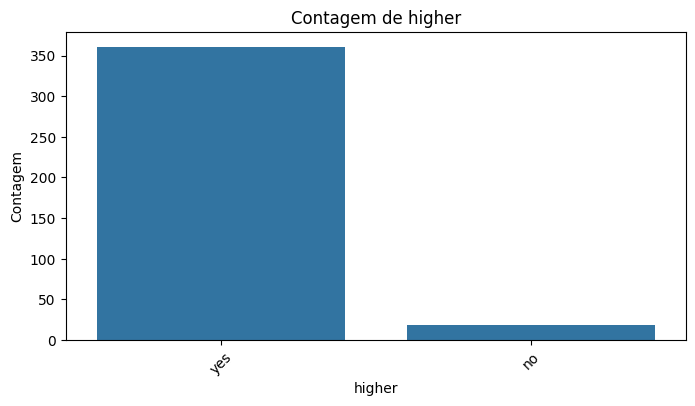

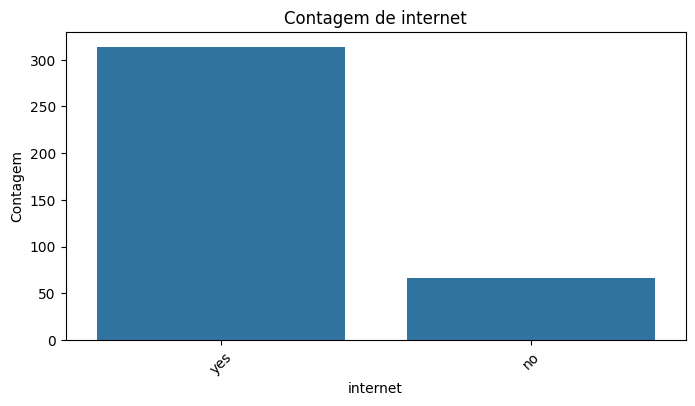

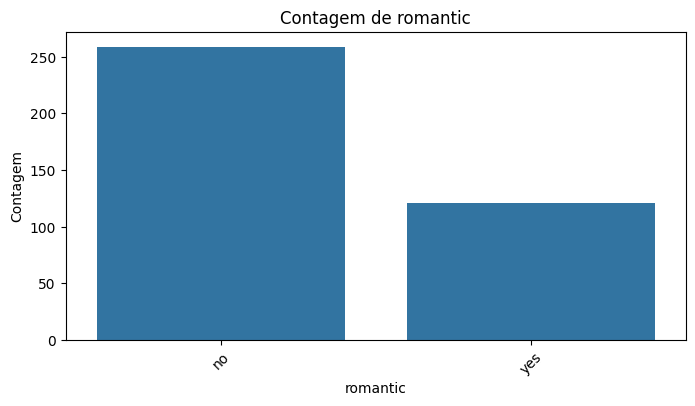

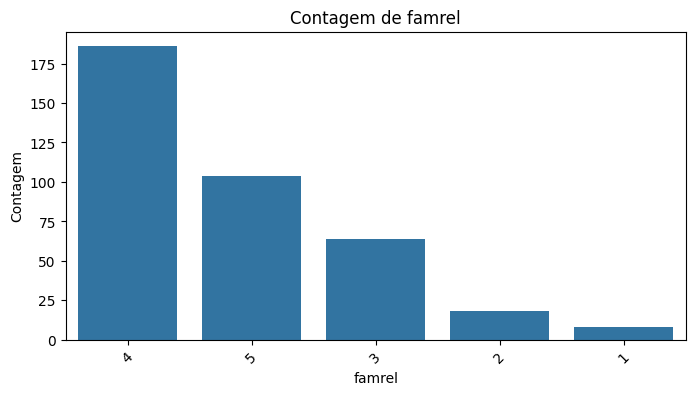

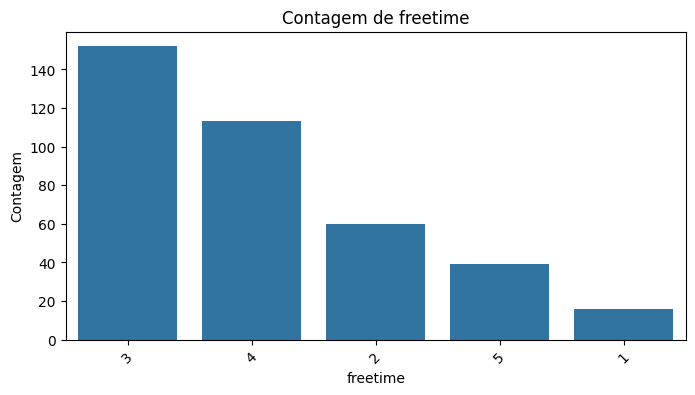

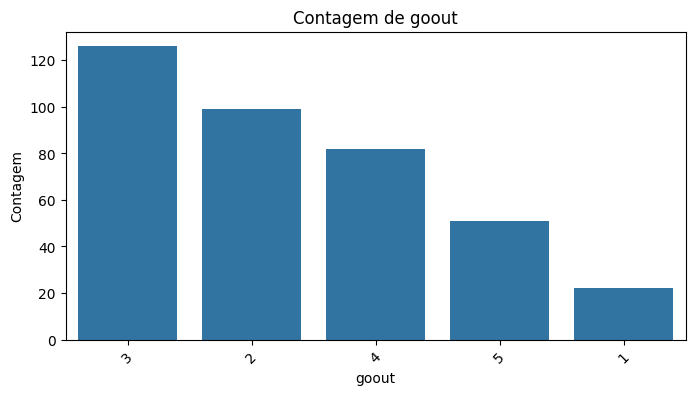

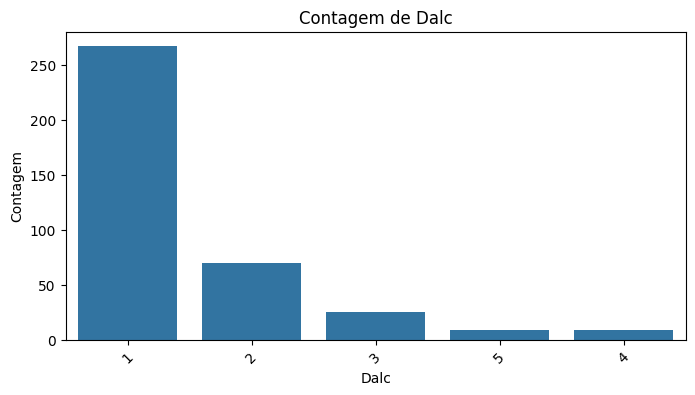

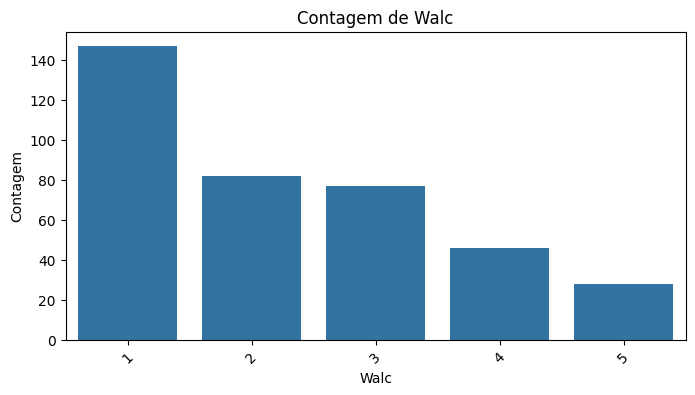

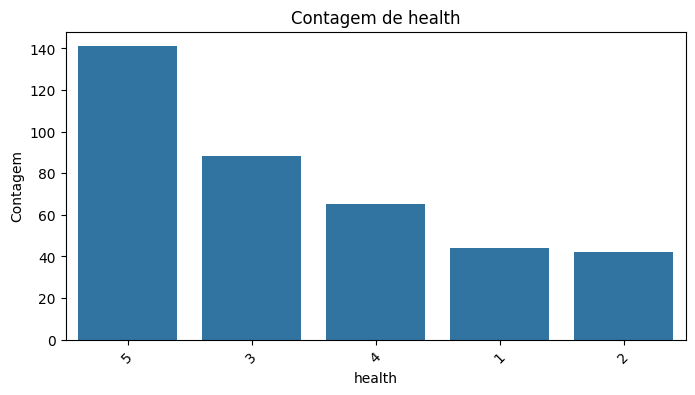

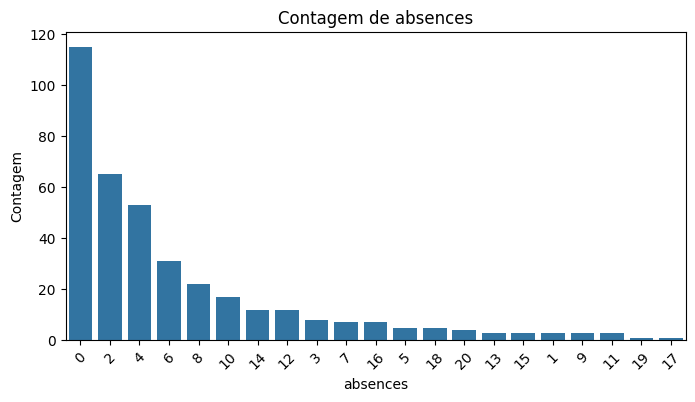

In [ ]:
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Contagem de {col}")
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-25-337408181.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='failures', y='Walc', ci='sd', capsize=.2)


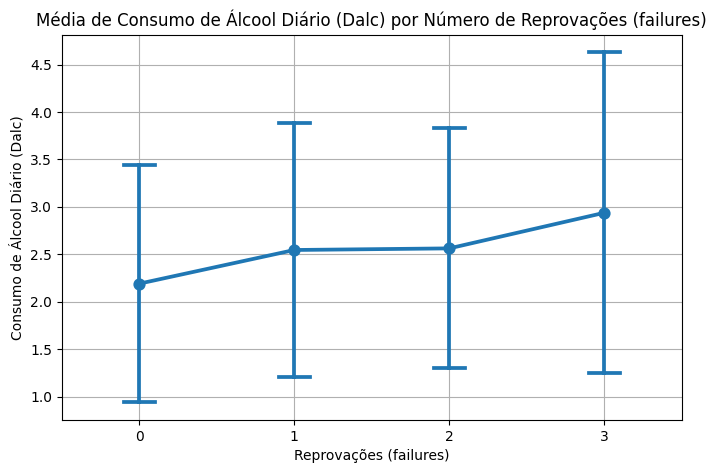

In [ ]:
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='failures', y='Walc', ci='sd', capsize=.2)

plt.title('Média de Consumo de Álcool Diário (Dalc) por Número de Reprovações (failures)')
plt.xlabel('Reprovações (failures)')
plt.ylabel('Consumo de Álcool Diário (Dalc)')
plt.grid(True)
plt.show()

Exemplo de um atributo que não possui correlação

/tmp/ipython-input-24-496267351.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='Pstatus', y='Walc', ci='sd', capsize=.2)


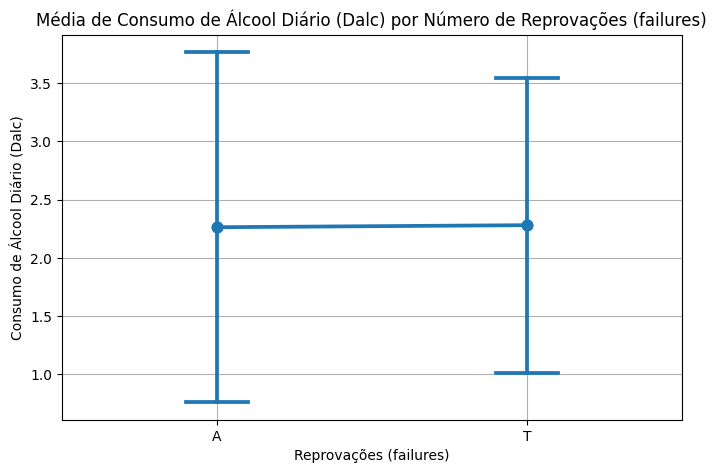

In [ ]:
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='Pstatus', y='Walc', ci='sd', capsize=.2)

plt.title('Média de Consumo de Álcool Diário (Dalc) por Número de Reprovações (failures)')
plt.xlabel('Reprovações (failures)')
plt.ylabel('Consumo de Álcool Diário (Dalc)')
plt.grid(True)
plt.show()

/tmp/ipython-input-28-611230787.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='higher', y='Dalc', ci='sd', capsize=.2)


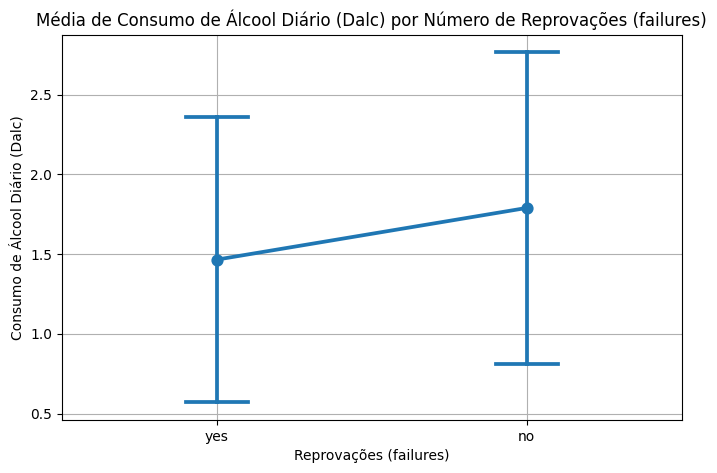

In [ ]:
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='higher', y='Dalc', ci='sd', capsize=.2)

plt.title('Média de Consumo de Álcool Diário (Dalc) por Intenção de cursar Ensino Superior (failures)')
plt.xlabel('Reprovações (failures)')
plt.ylabel('Consumo de Álcool Diário (Dalc)')
plt.grid(True)
plt.show()

/tmp/ipython-input-30-1150587320.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='famrel', y='Dalc', ci='sd', capsize=.2)


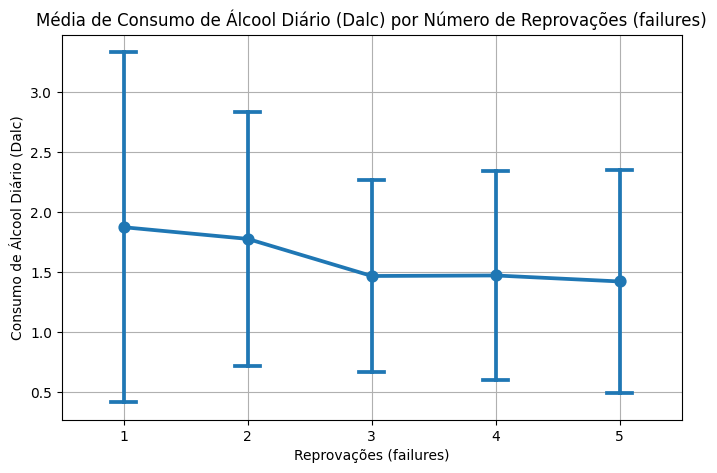

In [ ]:
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='famrel', y='Dalc', ci='sd', capsize=.2)

plt.title('Média de Consumo de Álcool Diário (Dalc) por Número de Reprovações (failures)')
plt.xlabel('Reprovações (failures)')
plt.ylabel('Consumo de Álcool Diário (Dalc)')
plt.grid(True)
plt.show()

/tmp/ipython-input-31-2002755118.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df, x='guardian', y='Dalc', ci='sd', capsize=.2)


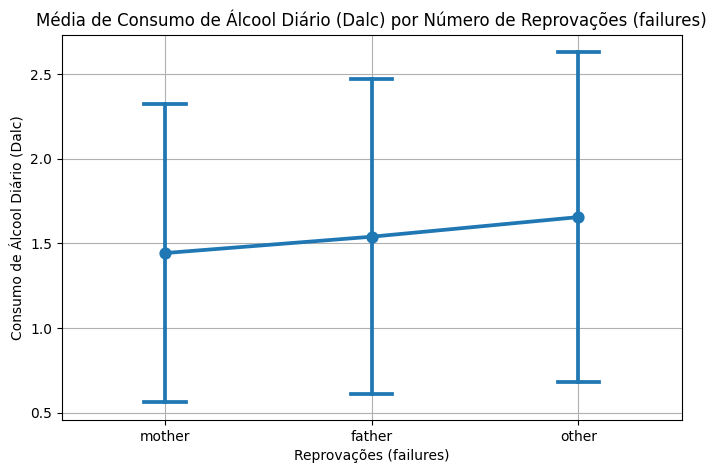

In [ ]:
plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x='guardian', y='Dalc', ci='sd', capsize=.2)

plt.title('Média de Consumo de Álcool Diário (Dalc) por Número de Reprovações (failures)')
plt.xlabel('Reprovações (failures)')
plt.ylabel('Consumo de Álcool Diário (Dalc)')
plt.grid(True)
plt.show()

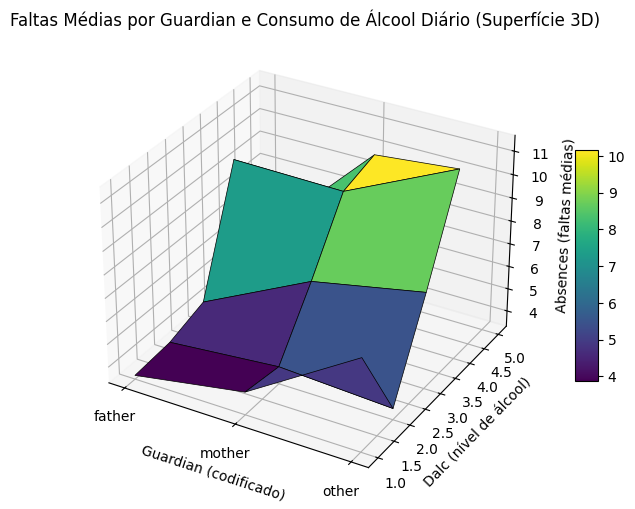

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Copiar e codificar variáveis categóricas
df_3d = df.copy()
df_3d['guardian_code'] = df_3d['guardian'].astype('category').cat.codes
df_3d['guardian_label'] = df_3d['guardian']
df_3d['Dalc'] = df_3d['Dalc'].astype(int)

# Agrupar por combinações de guardian e Dalc
grouped = df_3d.groupby(['guardian_code', 'Dalc']).agg({'absences': 'mean'}).reset_index()

# Transformar em grid para superfície
X = grouped['guardian_code']
Y = grouped['Dalc']
Z = grouped['absences']

# Criar malha de valores únicos
X_unique = sorted(df_3d['guardian_code'].unique())
Y_unique = sorted(df_3d['Dalc'].unique())
X_grid, Y_grid = np.meshgrid(X_unique, Y_unique)

# Criar matriz Z para os valores de absences
Z_grid = np.full(X_grid.shape, np.nan)
for i in range(len(grouped)):
    xi = grouped.iloc[i]['guardian_code']
    yi = grouped.iloc[i]['Dalc']
    zi = grouped.iloc[i]['absences']
    x_idx = X_unique.index(xi)
    y_idx = Y_unique.index(yi)
    Z_grid[y_idx, x_idx] = zi

# Gráfico 3D em formato de superfície
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='k', linewidth=0.5)

# Customização dos eixos
ax.set_xlabel('Guardian (codificado)')
ax.set_ylabel('Dalc (nível de álcool)')
ax.set_zlabel('Absences (faltas médias)')
ax.set_title('Faltas Médias por Guardian e Consumo de Álcool Diário (Superfície 3D)')

# Mapeamento de valores numéricos para os rótulos de guardian
guardian_labels = df_3d[['guardian_code', 'guardian_label']].drop_duplicates().sort_values('guardian_code')
ax.set_xticks(X_unique)
ax.set_xticklabels(guardian_labels['guardian_label'].values)

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


Formato da base: (395, 33)
Colunas: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

--- Primeiras linhas do DataFrame ---
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3

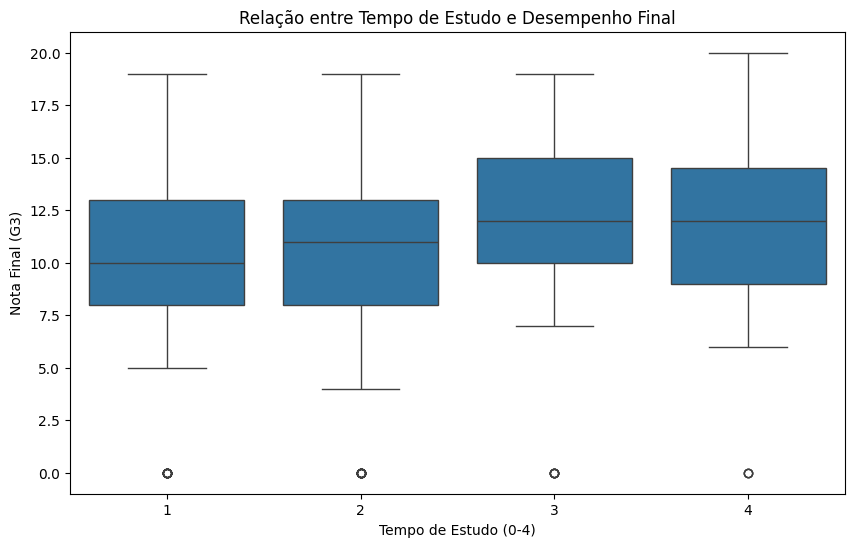

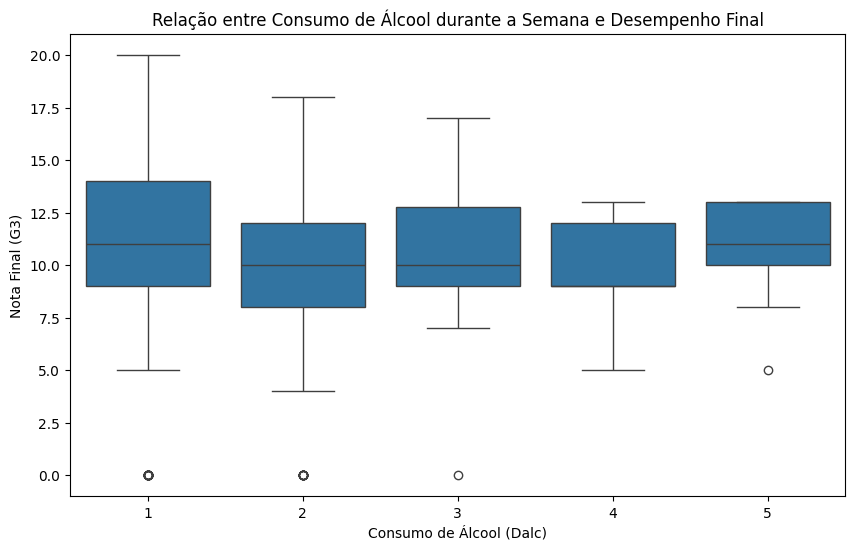

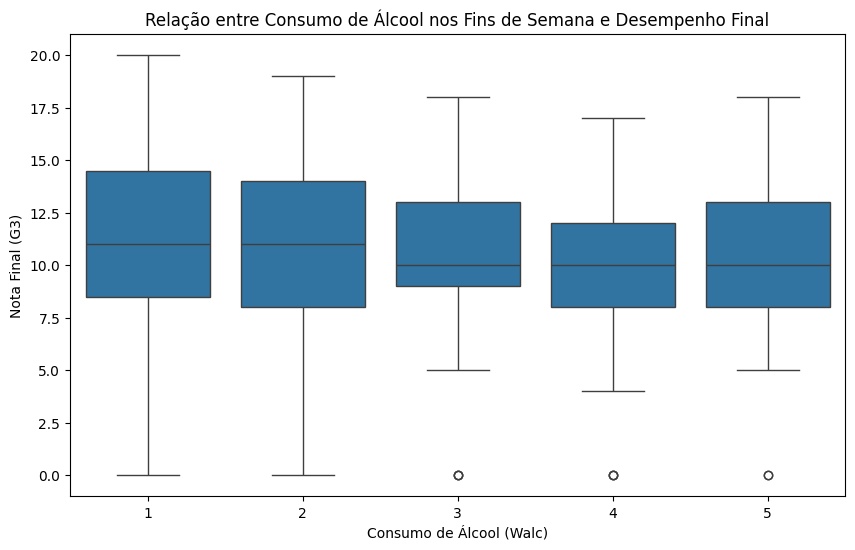

ValueError: Could not interpret value `activities` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os dados
df = pd.read_csv('student-mat.csv')

# Explorando os dados
print("Formato da base:", df.shape)
print("Colunas:", df.columns.tolist())
print("\n--- Primeiras linhas do DataFrame ---")
print(df.head())
print("\n--- Últimas linhas do DataFrame ---")
print(df.tail())
print("\n--- Amostra aleatória do DataFrame ---")
print(df.sample(5))
print("\n--- Estatísticas Descritivas para Colunas Numéricas ---")
print(df.describe())
print("\n--- Estatísticas Descritivas para Colunas Categóricas ---")
print(df.describe(include='object'))

# Contagem de valores únicos para colunas categóricas
print("\n--- Contagem de Valores Únicos para Colunas Categóricas ---")
for col in df.select_dtypes(include='object').columns:
    print(f"\nColuna '{col}':")
    print(df[col].value_counts())

# Verificando valores nulos e duplicatas
print("\n--- Valores Nulos ---")
print(df.isnull().sum())
print("\n--- Duplicatas ---")
print(df.duplicated().sum())

# Limpeza e pré-processamento
# Exemplo de codificação de variáveis categóricas
df = pd.get_dummies(df, columns=['school', 'sex', 'address', 'Mjob', 'Fjob', 'activities'], drop_first=True)

# Análise Exploratória de Dados (EDA)

# Pergunta 1: Qual a relação entre o tempo de estudo e o desempenho final?
plt.figure(figsize=(10, 6))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title('Relação entre Tempo de Estudo e Desempenho Final')
plt.xlabel('Tempo de Estudo (0-4)')
plt.ylabel('Nota Final (G3)')
plt.show()

# Pergunta 2: O consumo de álcool (Dalc e Walc) afeta as notas?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dalc', y='G3', data=df)
plt.title('Relação entre Consumo de Álcool durante a Semana e Desempenho Final')
plt.xlabel('Consumo de Álcool (Dalc)')
plt.ylabel('Nota Final (G3)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Walc', y='G3', data=df)
plt.title('Relação entre Consumo de Álcool nos Fins de Semana e Desempenho Final')
plt.xlabel('Consumo de Álcool (Walc)')
plt.ylabel('Nota Final (G3)')
plt.show()

# Pergunta 3: A participação em atividades extracurriculares (activities) tem impacto no desempenho?
plt.figure(figsize=(10, 6))
sns.boxplot(x='activities', y='G3', data=df)
plt.title('Impacto da Participação em Atividades Extracurriculares no Desempenho Final')
plt.xlabel('Participação em Atividades Extracurriculares')
plt.ylabel('Nota Final (G3)')
plt.show()

# Pergunta 4: Como a saúde (health) se relaciona com as notas?
plt.figure(figsize=(10, 6))
sns.boxplot(x='health', y='G3', data=df)
plt.title('Relação entre Saúde e Desempenho Final')
plt.xlabel('Saúde')
plt.ylabel('Nota Final (G3)')
plt.show()

# Pergunta 5: Qual a influência das faltas (absences) nas notas?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='G3', data=df)
plt.title('Influência das Faltas nas Notas Finais')
plt.xlabel('Número de Faltas')
plt.ylabel('Nota Final (G3)')
plt.show()

# Pergunta 6: Existe diferença de desempenho entre os sexos?
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='G3', data=df)
plt.title('Diferença de Desempenho entre Sexos')
plt.xlabel('Sexo')
plt.ylabel('Nota Final (G3)')
plt.show()

# Pergunta 7: A localização da residência (address) influencia as notas?
plt.figure(figsize=(10, 6))
sns.boxplot(x='address', y='G3', data=df)
plt.title('Impacto da Localização da Residência no Desempenho Final')
plt.xlabel('Localização da Residência')
plt.ylabel('Nota Final (G3)')
plt.show()

# Pergunta 8: Qual a correlação entre as notas do primeiro, segundo e terceiro período (G1, G2, G3)?
plt.figure(figsize=(10, 6))
sns.heatmap(df[['G1', 'G2', 'G3']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre Notas dos Períodos')
plt.show()